In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix

# load data

In [45]:
df = pd.read_csv('conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [47]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [48]:
# case in the age column, the max age is 123, so we have to deal with it
df.loc[df['age']>90]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [49]:
df = df.loc[df['age']<90]
df.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


# Exploratory data analysis

In [50]:
country_dist = pd.DataFrame(df.loc[:,'country'].value_counts())
country_dist

,country
US,178092
China,76602
UK,48449
Germany,13055


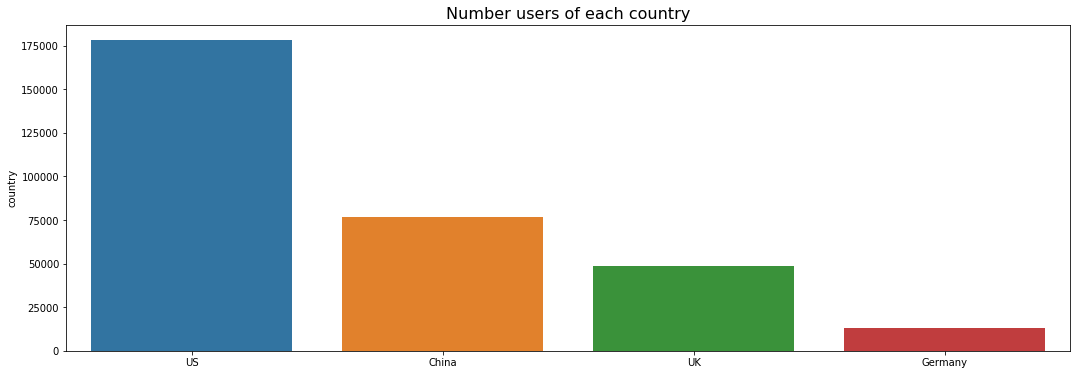

In [76]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x=country_dist.index,y='country',data=country_dist)
plt.title('Number users of each country',fontsize=16)

plt.show()

   country  converted
0    China   0.001332
1  Germany   0.062428
2       UK   0.052612
3       US   0.037801


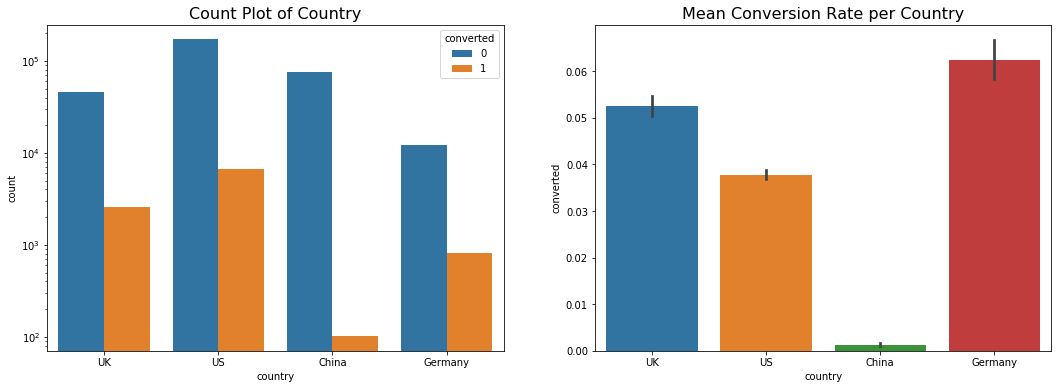

In [52]:
## visualization of different countries

group_df = df.loc[:,['country','converted']].groupby('country').mean().reset_index()
print(group_df)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))

sns.countplot(x='country', hue='converted',data=df,ax=ax[0])
ax[0].set_title('Count Plot of Country',fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='country',y='converted',data=df,ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)
# plt.tight_layout()
plt.show()

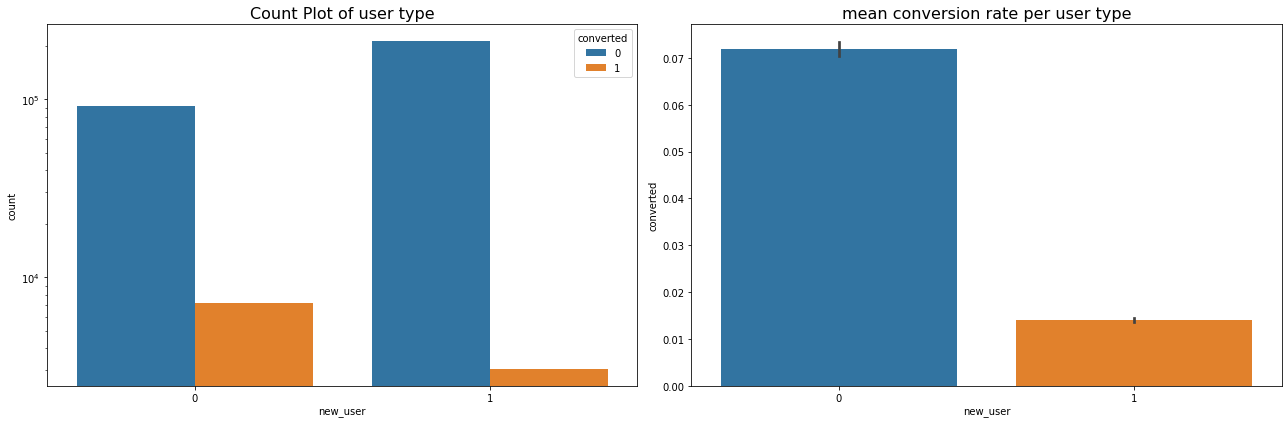

In [53]:
## visualization of different user types

group_user = df.loc[:,['new_user','converted']].groupby('new_user').mean().reset_index()
group_user

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,6))

sns.countplot(x='new_user', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of user type', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='new_user', y='converted', data=df, ax=ax[1])
ax[1].set_title('mean conversion rate per user type', fontsize=16)

plt.tight_layout()
plt.show()

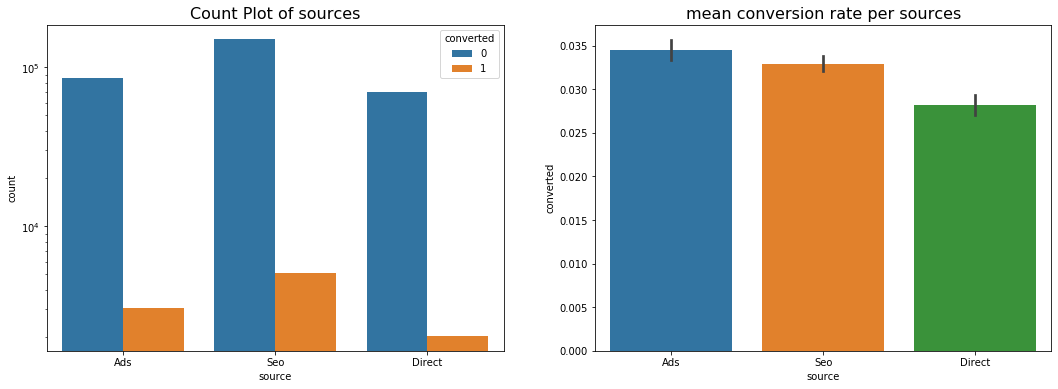

In [54]:
## visualization of different sources

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

sns.countplot(x='source', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of sources', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='source', y='converted', data=df, ax=ax[1])
ax[1].set_title('mean conversion rate per sources', fontsize=16)

plt.show()

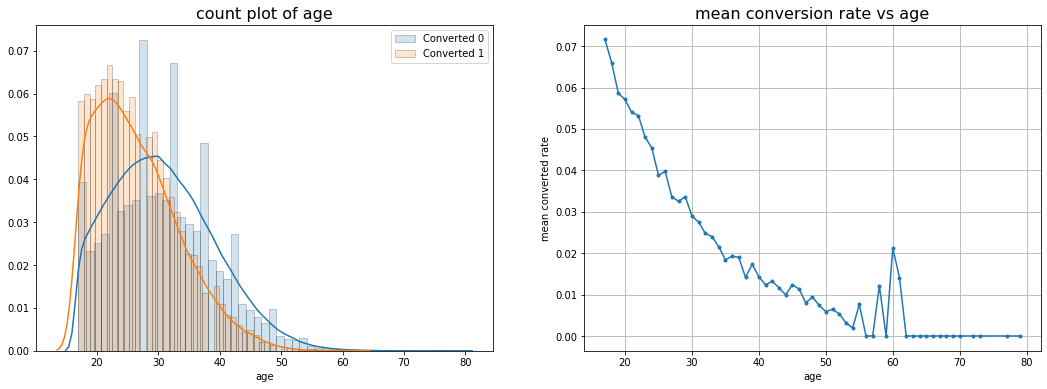

In [55]:
# Visualization of age

group_line = df.loc[:,['age','converted']].groupby('age').mean().reset_index()
hist_kws = {'histtype': 'bar','edgecolor':'black', 'alpha':0.2}

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.distplot(df[df['converted']==0]['age'], label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted']==1]['age'], label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('count plot of age', fontsize=16)
ax[0].legend()

ax[1].plot(group_line['age'],group_line['converted'],'.-')
ax[1].set_title('mean conversion rate vs age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('mean converted rate')
ax[1].grid(True)

plt.show()

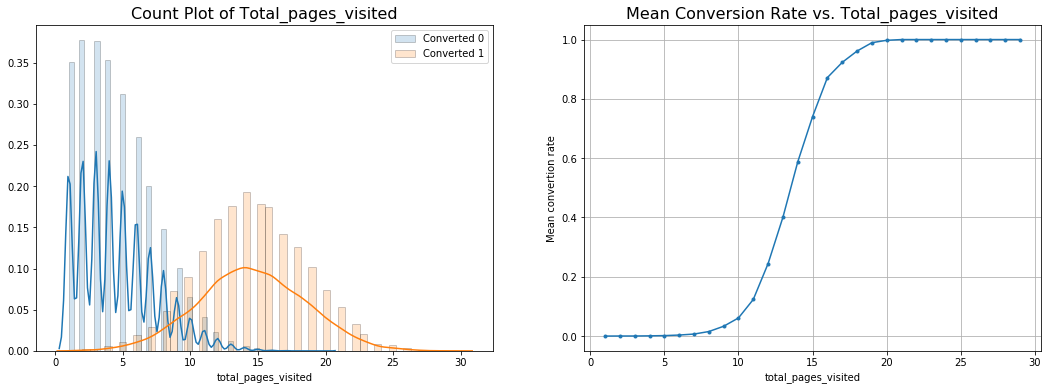

In [56]:
# Visualization of total pages visited

grouped = df[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted'] == 0]['total_pages_visited'], 
             label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted'] == 1]['total_pages_visited'], 
             label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Total_pages_visited', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Total_pages_visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

## Data Preprocessing

In [57]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [58]:
X = df.loc[:,('country', 'age', 'new_user', 'source', 'total_pages_visited')]
y = df.loc[:,'converted']

In [59]:
#use One-Hot-Encoding to transform  'country' and 'source' columns into numerical values
X = df.loc[:,('country', 'age', 'new_user', 'source', 'total_pages_visited')]
X = pd.get_dummies(X)# OHE those categorical features

In [60]:
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [61]:
# use average value of the target values to see the average conversion rate 
# also the target values is very imbalanced, therefore we should not use "accuracy" alone as an indicator 
   #of how good a classifier is
y.mean()

0.03225194340255157

In [62]:
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=22)

### Grid Search for Logistic Regression model

In [63]:
## build a normal  Logistic Regression model to see the score
logist = LogisticRegression()
logist.fit(x_train, y_train)
pred_y = logist.predict(x_test)
score= round(accuracy_score(y_test,pred_y)* 100, 2)
score

98.57

In [64]:
logist_new = LogisticRegression(solver="liblinear", max_iter=200)

grid = {"penalty" : ["l2"], "C" : np.arange(10,80,2)} # (60,62,64 ... 78)

log_reg_cv = GridSearchCV(logist_new, grid, cv=3)
log_reg_cv.fit(x_train, y_train)

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_)) 
print("Best score: {}".format(log_reg_cv.best_score_))

Tuned hyperparameter n_estimators: {'C': 10, 'penalty': 'l2'}
Best score: 0.9862744009866479


In [65]:
best_logist = LogisticRegression(C = 10, penalty= 'l2',solver="liblinear", max_iter=1000)
best_logist.fit(x_train, y_train)
pred_y = best_logist.predict(x_test)
score= round(accuracy_score(y_test,pred_y)* 100, 2)
score

98.57

In [66]:
logist_cm = confusion_matrix(y_test, pred_y)
print(logist_cm)

[[60942   233]
 [  673  1392]]


Text(0.5, 1, 'Logistic regression accuracy Score:98.57')

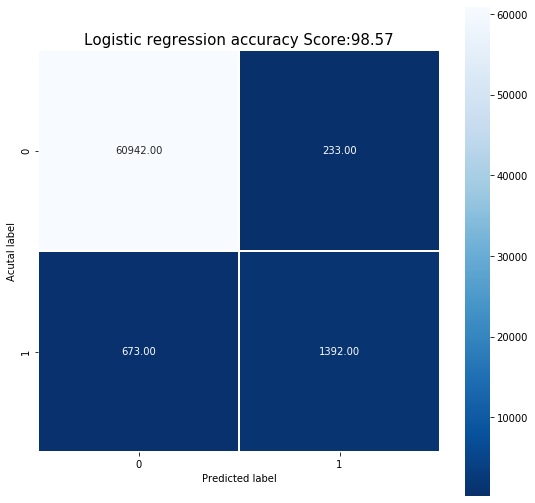

In [67]:
plt.figure(figsize=(9,9))
sns.heatmap(logist_cm, annot=True, fmt='.2f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Acutal label')
plt.xlabel('Predicted label')
all_sample_title = f'Logistic regression accuracy Score:{score}'
plt.title(all_sample_title, size=15)

In [68]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61175
           1       0.86      0.67      0.75      2065

    accuracy                           0.99     63240
   macro avg       0.92      0.84      0.87     63240
weighted avg       0.98      0.99      0.98     63240



In [69]:
feat_importances = pd.DataFrame({"name":x_train.columns,"coef":best_logist.coef_[0]})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

,name,coef,importances
3,country_China,-3.833176,3.833176
8,source_Direct,-1.775253,1.775253
1,new_user,-1.693586,1.693586
9,source_Seo,-1.590452,1.590452
7,source_Ads,-1.561535,1.561535
2,total_pages_visited,0.760157,0.760157
6,country_US,-0.658023,0.658023
5,country_UK,-0.301003,0.301003
4,country_Germany,-0.135039,0.135039
0,age,-0.073640,0.073640
